#### Loading the dataset

In [ ]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

!tar -xf VOCtrainval_11-May-2012.tar -C /content/


--2024-12-12 10:18:29--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  36.4MB/s    in 53s     

2024-12-12 10:19:22 (36.0 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]



#### Explotary Data Analysis (EDA)



In [ ]:
import os
from collections import Counter

annotations_dir = "/content/VOCdevkit/VOC2012/Annotations"
images_dir = "/content/VOCdevkit/VOC2012/JPEGImages"

num_images = len(os.listdir(images_dir))
print(f"Total number of images: {num_images}")

def parse_classes(annotation_file):
    import xml.etree.ElementTree as ET
    tree = ET.parse(annotation_file)
    root = tree.getroot()
    classes = [obj.find("name").text for obj in root.findall("object")]
    return classes

all_classes = []
for annotation_file in os.listdir(annotations_dir):
    file_path = os.path.join(annotations_dir, annotation_file)
    all_classes.extend(parse_classes(file_path))

class_distribution = Counter(all_classes)
print(f"Number of unique classes: {len(class_distribution)}")
print("Class Distribution:")
for class_name, count in class_distribution.items():
    print(f"  {class_name}: {count}")


Total number of images: 17125
Number of unique classes: 20
Class Distribution:
  bird: 1271
  person: 17401
  bus: 685
  tvmonitor: 893
  chair: 3056
  bottle: 1561
  cat: 1277
  train: 704
  motorbike: 801
  cow: 771
  dog: 1598
  aeroplane: 1002
  diningtable: 800
  car: 2492
  sheep: 1084
  bicycle: 837
  sofa: 841
  horse: 803
  pottedplant: 1202
  boat: 1059


Load and Visualize Data

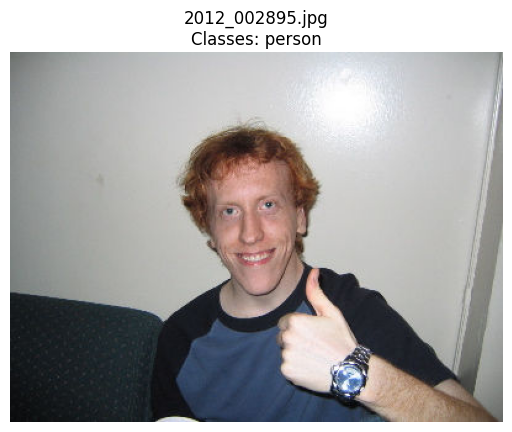

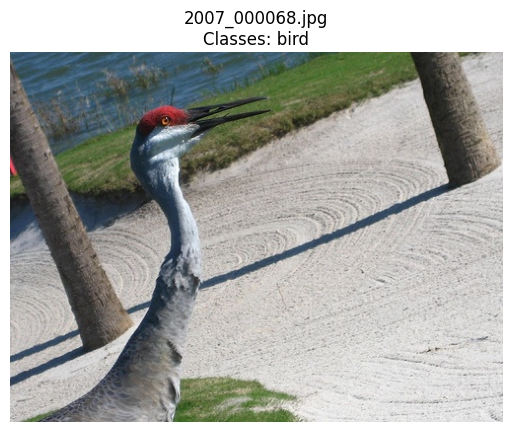

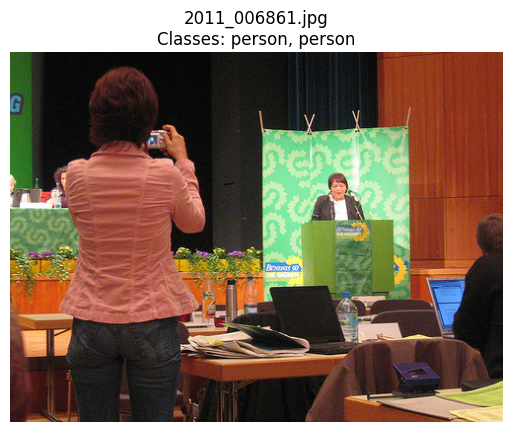

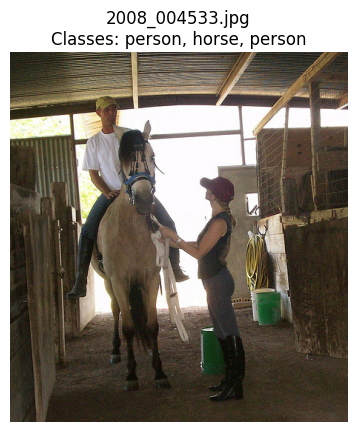

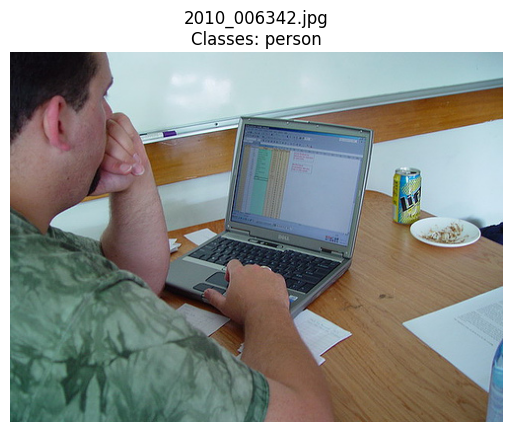

In [ ]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import xml.etree.ElementTree as ET

images_dir = '/content/VOCdevkit/VOC2012/JPEGImages/'
annotations_dir = '/content/VOCdevkit/VOC2012/Annotations/'

def parse_annotation(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    object_classes = []
    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        object_classes.append(obj_name)
    return object_classes

image_files = os.listdir(images_dir)

random_images = random.sample(image_files, 5)

for image_file in random_images:
    img = Image.open(os.path.join(images_dir, image_file))

    annotation_file = os.path.join(annotations_dir, image_file.replace('.jpg', '.xml'))

    object_classes = parse_annotation(annotation_file)

    title = f"{image_file}\nClasses: {', '.join(object_classes)}"

    plt.figure()
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()


Load and Parse Annotations

In [ ]:
import xml.etree.ElementTree as ET

annotations_dir = '/content/VOCdevkit/VOC2012/Annotations/'

def parse_annotation(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    objects = []
    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        bndbox = obj.find('bndbox')
        bbox = {
            'xmin': int(bndbox.find('xmin').text),
            'ymin': int(bndbox.find('ymin').text),
            'xmax': int(bndbox.find('xmax').text),
            'ymax': int(bndbox.find('ymax').text)
        }
        objects.append({'name': obj_name, 'bbox': bbox})
    return objects

# Testing with one annotation file..
annotation_file = os.path.join(annotations_dir, random_images[0].replace('.jpg', '.xml'))
print(parse_annotation(annotation_file))


[{'name': 'person', 'bbox': {'xmin': 112, 'ymin': 58, 'xmax': 400, 'ymax': 300}}]


 EDA on Object Classes

In [ ]:
import xml.etree.ElementTree as ET

def parse_annotation(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    objects = []
    for obj in root.findall('object'):
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        bbox = {
            'xmin': int(float(bndbox.find('xmin').text)),
            'ymin': int(float(bndbox.find('ymin').text)),
            'xmax': int(float(bndbox.find('xmax').text)),
            'ymax': int(float(bndbox.find('ymax').text))
        }
        objects.append({'name': name, 'bbox': bbox})

    return objects


EDA on Bounding Box Sizes


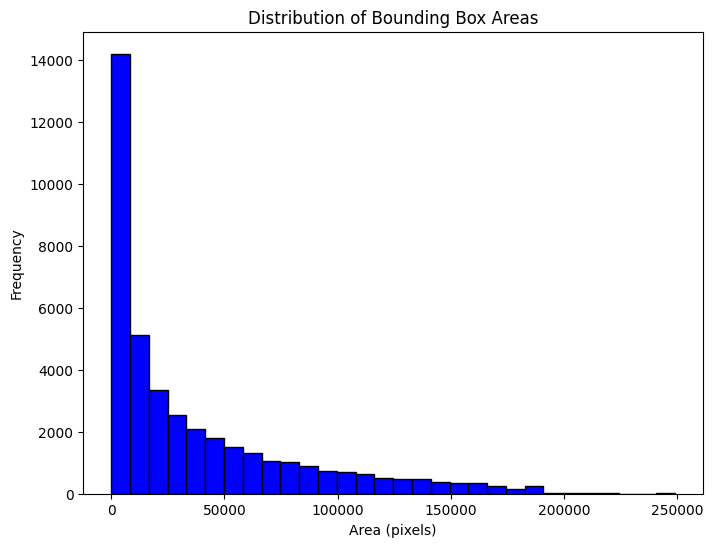

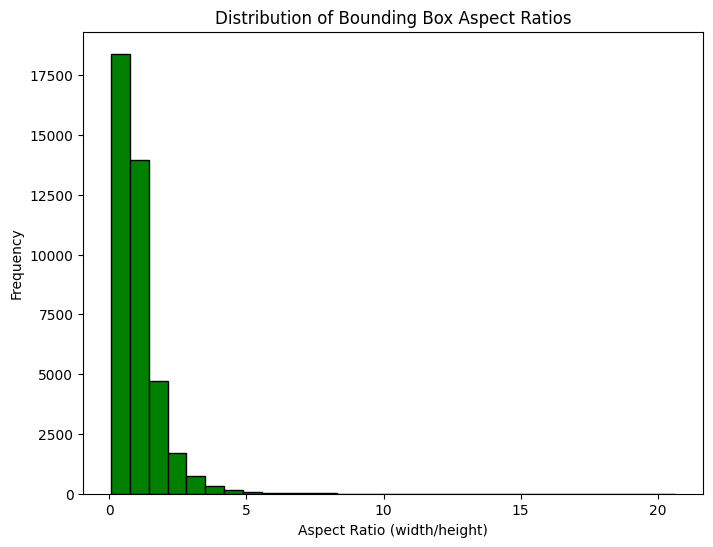

In [ ]:
bbox_areas = []
aspect_ratios = []

for annotation_file in os.listdir(annotations_dir):
    file_path = os.path.join(annotations_dir, annotation_file)
    objects = parse_annotation(file_path)
    for obj in objects:
        bbox = obj['bbox']
        width = bbox['xmax'] - bbox['xmin']
        height = bbox['ymax'] - bbox['ymin']
        bbox_areas.append(width * height)
        aspect_ratios.append(width / height)

# Plot bounding box areas
plt.figure(figsize=(8, 6))
plt.hist(bbox_areas, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Bounding Box Areas')
plt.xlabel('Area (pixels)')
plt.ylabel('Frequency')
plt.show()

# Plot aspect ratio distribution
plt.figure(figsize=(8, 6))
plt.hist(aspect_ratios, bins=30, color='green', edgecolor='black')
plt.title('Distribution of Bounding Box Aspect Ratios')
plt.xlabel('Aspect Ratio (width/height)')
plt.ylabel('Frequency')
plt.show()


Image Size Distribution

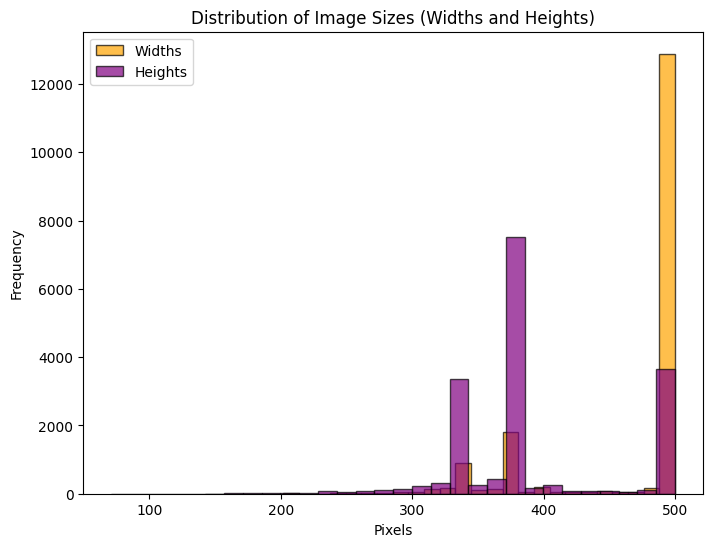

In [ ]:
image_sizes = []

for image_file in os.listdir(images_dir):
    img = Image.open(os.path.join(images_dir, image_file))
    image_sizes.append(img.size)

widths, heights = zip(*image_sizes)

plt.figure(figsize=(8, 6))
plt.hist(widths, bins=30, color='orange', edgecolor='black', alpha=0.7, label='Widths')
plt.hist(heights, bins=30, color='purple', edgecolor='black', alpha=0.7, label='Heights')
plt.title('Distribution of Image Sizes (Widths and Heights)')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Distribution of Object Instances per Image

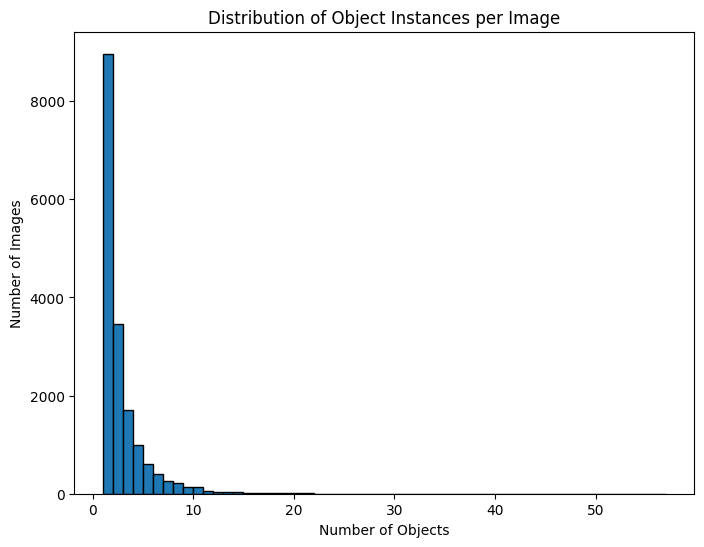

In [ ]:
object_counts_per_image = []

for annotation_file in os.listdir(annotations_dir):
    file_path = os.path.join(annotations_dir, annotation_file)
    objects = parse_annotation(file_path)
    object_counts_per_image.append(len(objects))

plt.figure(figsize=(8, 6))
plt.hist(object_counts_per_image, bins=range(1, max(object_counts_per_image)+2), edgecolor='black')
plt.title('Distribution of Object Instances per Image')
plt.xlabel('Number of Objects')
plt.ylabel('Number of Images')
plt.show()


Commonly Co-occurring Object Classes

Image Sizes and Resolutions

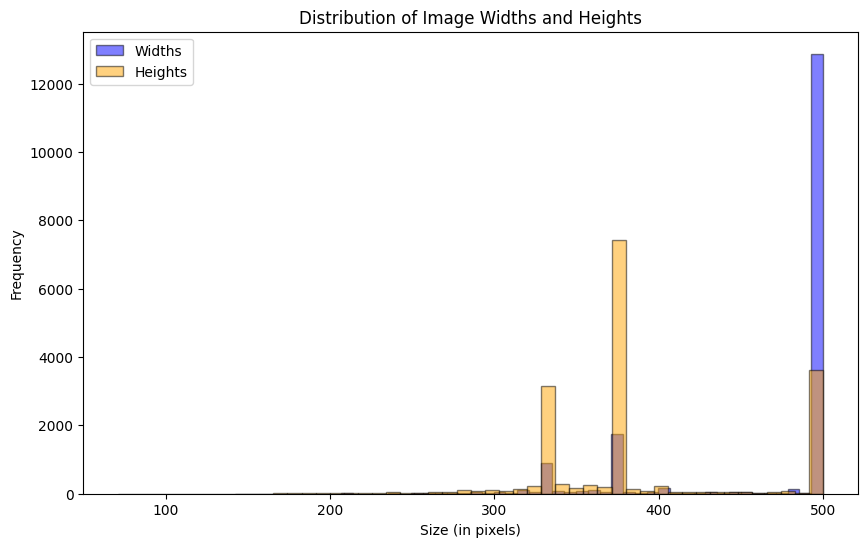

In [ ]:
image_sizes = []

for image_file in os.listdir(images_dir):
    img = Image.open(os.path.join(images_dir, image_file))
    image_sizes.append(img.size)

widths, heights = zip(*image_sizes)

plt.figure(figsize=(10, 6))
plt.hist(widths, bins=50, alpha=0.5, label='Widths', color='blue', edgecolor='black')
plt.hist(heights, bins=50, alpha=0.5, label='Heights', color='orange', edgecolor='black')
plt.title('Distribution of Image Widths and Heights')
plt.xlabel('Size (in pixels)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Segmentation Data Analysis

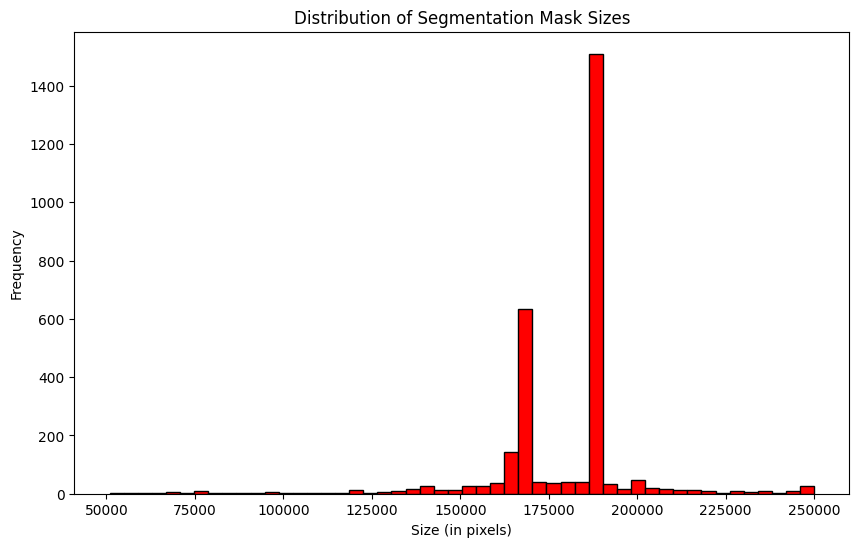

In [ ]:
seg_dir = '/content/VOCdevkit/VOC2012/SegmentationClass/'

seg_files = os.listdir(seg_dir)

seg_sizes = []

for seg_file in seg_files:
    seg_mask = Image.open(os.path.join(seg_dir, seg_file))
    seg_sizes.append(seg_mask.size)

plt.figure(figsize=(10, 6))
plt.hist([w * h for w, h in seg_sizes], bins=50, color='red', edgecolor='black')
plt.title('Distribution of Segmentation Mask Sizes')
plt.xlabel('Size (in pixels)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
!pip install segmentation_models_pytorch --quiet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.0 MB/s eta 0:00:00


#### Custom Dataset

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Class and colormap definitions for PASCAL VOC....
VOC_CLASSES = [
    "background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus",
    "car", "cat", "chair", "cow", "diningtable", "dog", "horse",
    "motorbike", "person", "potted plant", "sheep", "sofa", "train", "tv/monitor"
]

VOC_COLORMAP = [
    [0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0], [0, 0, 128],
    [128, 0, 128], [0, 128, 128], [128, 128, 128], [64, 0, 0], [192, 0, 0],
    [64, 128, 0], [192, 128, 0], [64, 0, 128], [192, 0, 128], [64, 128, 128],
    [192, 128, 128], [0, 64, 0], [128, 64, 0], [0, 192, 0], [128, 192, 0],
    [0, 64, 128]
]

class VOCDataset(Dataset):
    def __init__(self, root="/content/VOCdevkit/VOC2012", is_train=True, transform=None, classes=None):
        if is_train:
            img_root = os.path.join(root, "ImageSets", "Segmentation", "train.txt")
        else:
            img_root = os.path.join(root, "ImageSets", "Segmentation", "val.txt")

        img_names = []
        with open(img_root, 'r') as rf:
            names = [name.replace('\n','') for name in rf.readlines()]
            for name in names:
                img_names.append(name)

        self.classes = classes
        self.transform = transform
        self.img_names = img_names
        self.root = root

    def __len__(self):
        return len(self.img_names)

    def _convert_to_segmentation_mask(self, mask):
        height, width = mask.shape[:2]
        segmentation_mask = np.zeros((height, width, len(VOC_COLORMAP)))

        for label_index, label in enumerate(VOC_COLORMAP):
            segmentation_mask[:, :, label_index] = np.all(mask == label, axis=-1).astype(float)

        return segmentation_mask

    def __getitem__(self, item):
        img_name = self.img_names[item]
        img = cv2.imread(os.path.join(self.root, "JPEGImages", img_name + ".jpg"))
        mask = cv2.imread(os.path.join(self.root, "SegmentationClass", img_name + ".png"))

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

        # Convert RGB mask to segmentation mask
        mask = self._convert_to_segmentation_mask(mask)

        if self.transform:
            augmented = self.transform(image=img, mask=mask)
            img = augmented['image']
            mask = augmented['mask']
            mask = mask.argmax(dim=2).squeeze()

        return img, mask


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:

transform = A.Compose([
    A.Resize(224, 224),
    A.HorizontalFlip(p=0.5),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

train_dataset = VOCDataset(root='/content/VOCdevkit/VOC2012', is_train=True, transform=transform, classes=VOC_CLASSES)
val_dataset = VOCDataset(root='/content/VOCdevkit/VOC2012', is_train=False, transform=transform, classes=VOC_CLASSES)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")


Train dataset size: 1464
Validation dataset size: 1449


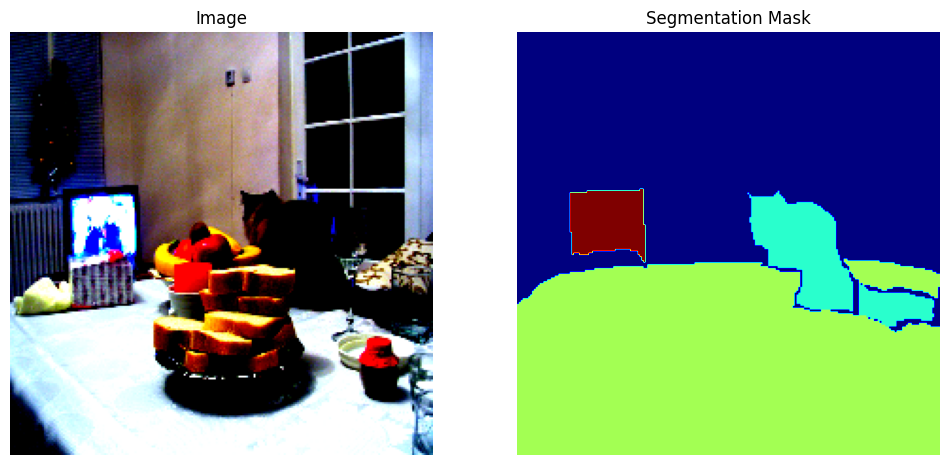

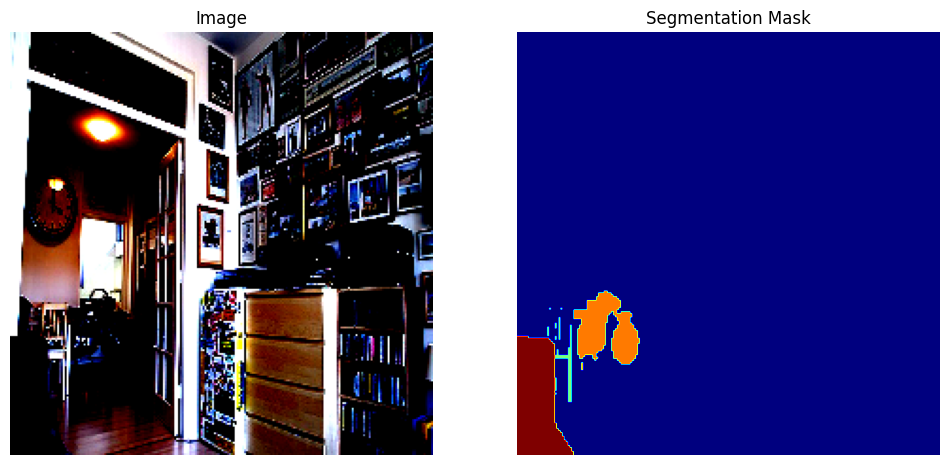

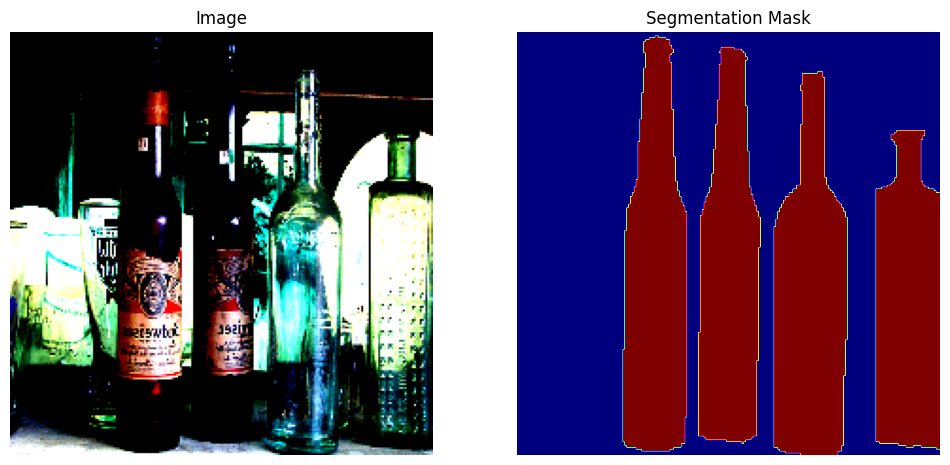

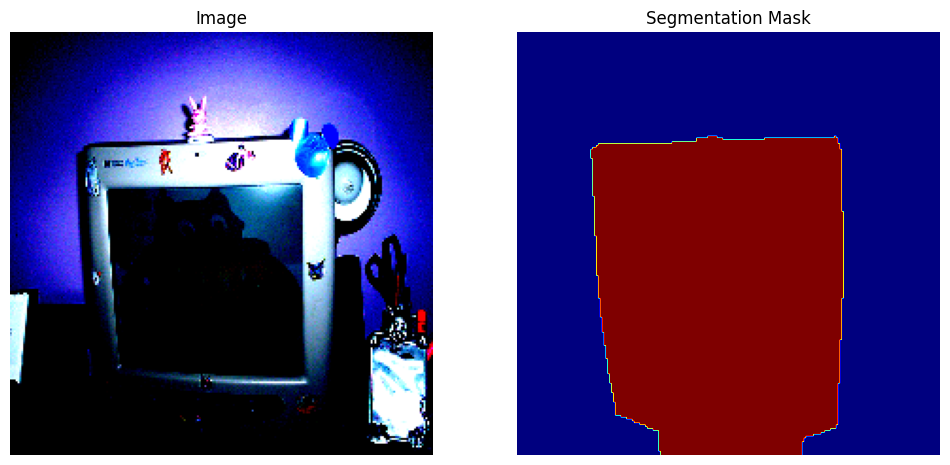

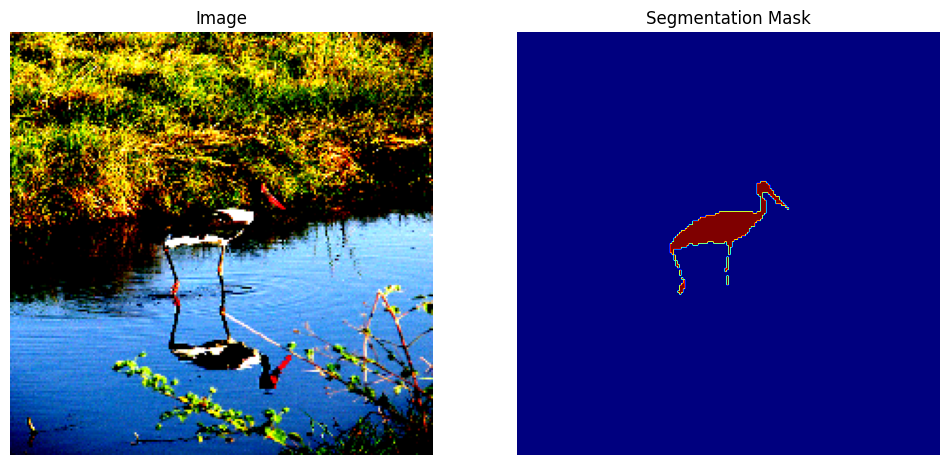

In [ ]:
def visualize_sample(image, mask):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.imshow(image.permute(1, 2, 0).cpu().numpy())
    ax1.set_title("Image")
    ax1.axis("off")

    ax2.imshow(mask.cpu().numpy(), cmap="jet")  # Show mask as class indices...
    ax2.set_title("Segmentation Mask")
    ax2.axis("off")

    plt.show()

def visualize_dataloader_samples(data_loader):
    for images, masks in data_loader:
        for i in range(min(len(images), 5)):
            visualize_sample(images[i], masks[i])
        break

visualize_dataloader_samples(train_loader)


#### MODEL

In [ ]:
!pip install transformers


#### Classification

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from transformers import ViTModel, ViTConfig
from torch.utils.data import DataLoader, Dataset
import albumentations as A
from albumentations.pytorch import ToTensorV2
import os
import cv2
import xml.etree.ElementTree as ET

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ClassificationDataset(Dataset):
    def __init__(self, root="./VOCdevkit/VOC2012", classes=None, transform=None):
        self.image_dir = os.path.join(root, "JPEGImages")
        self.annotations_dir = os.path.join(root, "Annotations")
        self.image_paths = []
        self.labels = []
        self.classes = classes
        self.transform = transform

        for xml_file in os.listdir(self.annotations_dir):
            file_path = os.path.join(self.annotations_dir, xml_file)
            tree = ET.parse(file_path)
            root = tree.getroot()

            filename = root.find("filename").text
            label_name = root.find("object").find("name").text

            if label_name in self.classes:
                self.image_paths.append(os.path.join(self.image_dir, filename))
                self.labels.append(self.classes.index(label_name))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.cvtColor(cv2.imread(self.image_paths[idx]), cv2.COLOR_BGR2RGB)
        label = self.labels[idx]
        if self.transform:
            img = self.transform(image=img)["image"]
        return img, label

class PretrainDataset(Dataset):
    def __init__(self, root="./VOCdevkit/VOC2012", transform=None):
        self.image_dir = os.path.join(root, "JPEGImages")
        self.image_paths = [os.path.join(self.image_dir, img) for img in os.listdir(self.image_dir)]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.cvtColor(cv2.imread(self.image_paths[idx]), cv2.COLOR_BGR2RGB)
        if self.transform:
            img = self.transform(image=img)["image"]
        return img

transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

VOC_CLASSES = [
    "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow",
    "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]

pretrain_dataset = PretrainDataset(root="./VOCdevkit/VOC2012", transform=transform)
pretrain_loader = DataLoader(pretrain_dataset, batch_size=16, shuffle=True)

train_dataset = ClassificationDataset(root="./VOCdevkit/VOC2012", classes=VOC_CLASSES, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = ClassificationDataset(root="./VOCdevkit/VOC2012", classes=VOC_CLASSES, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


# Masked Autoencoder Class...
class MaskedAutoencoder(nn.Module):
    def __init__(self, vit_model, mask_ratio=0.75):
        super(MaskedAutoencoder, self).__init__()
        self.vit = vit_model
        self.mask_ratio = mask_ratio
        self.decoder = nn.Linear(vit_model.config.hidden_size, vit_model.config.patch_size ** 2 * 3)

    def forward(self, x, mask=True):
        batch_size, _, height, width = x.shape
        patch_size = self.vit.config.patch_size

        patches = x.unfold(2, patch_size, patch_size).unfold(3, patch_size, patch_size)
        patches = patches.contiguous().view(batch_size, 3, -1, patch_size * patch_size)
        patches = patches.permute(0, 2, 1, 3).reshape(batch_size, -1, patch_size * patch_size * 3)

        # Apply masking...
        if mask:
            num_patches = patches.shape[1]
            num_masked = int(self.mask_ratio * num_patches)
            mask_indices = torch.randperm(num_patches)[:num_masked]
            patches[:, mask_indices, :] = 0

        # Encode using ViT..
        encoded = self.vit(pixel_values=x).last_hidden_state

        decoded = self.decoder(encoded[:, 1:, :])

        grid_size = int((decoded.shape[1])**0.5)
        decoded = decoded.view(batch_size, grid_size, grid_size, patch_size, patch_size, 3)
        decoded = decoded.permute(0, 5, 1, 3, 2, 4).contiguous()
        reconstructed = decoded.view(batch_size, 3, height, width)

        return reconstructed

# ViT-MAE Classification Model...
class ViTMAEClassification(nn.Module):
    def __init__(self, mae_model, num_classes):
        super(ViTMAEClassification, self).__init__()
        self.mae = mae_model
        self.classifier = nn.Linear(mae_model.vit.config.hidden_size, num_classes)

    def forward(self, x):
        encoded = self.mae.vit(pixel_values=x).pooler_output
        return self.classifier(encoded)

vit_config = ViTConfig.from_pretrained("google/vit-base-patch16-224-in21k")
vit_model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k", config=vit_config)
mae_model = MaskedAutoencoder(vit_model)
vitmae_cls_model = ViTMAEClassification(mae_model, num_classes=len(VOC_CLASSES)).to(device)

optimizer_mae = Adam(mae_model.parameters(), lr=1e-4)
criterion_mae = nn.MSELoss()
optimizer_cls = Adam(vitmae_cls_model.parameters(), lr=1e-4)
criterion_cls = CrossEntropyLoss()

def pretrain_mae(model, loader, optimizer, criterion, device, epochs=15):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        total_correct = 0
        total_samples = 0
        for images in loader:
            images = images.to(device)
            optimizer.zero_grad()

            reconstructed = model(images, mask=True)
            loss = criterion(reconstructed, images)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            total_correct += torch.isclose(reconstructed, images, atol=0.1).sum().item()
            total_samples += images.numel()

        accuracy = (total_correct / total_samples) * 100
        print(f"Epoch {epoch+1}/{epochs}, Pretrain Loss: {total_loss/len(loader):.4f}, Pretrain Accuracy: {accuracy:.2f}%")

def train_classification(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        predictions = torch.argmax(outputs, dim=1)
        total_correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)

    accuracy = (total_correct / total_samples) * 100
    return total_loss / len(loader), accuracy

def validate_classification(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            predictions = torch.argmax(outputs, dim=1)
            total_correct += (predictions == labels).sum().item()
            total_samples += labels.size(0)

    accuracy = (total_correct / total_samples) * 100
    return total_loss / len(loader), accuracy

pretrain_mae(mae_model, pretrain_loader, optimizer_mae, criterion_mae, device, epochs=15)

num_epochs = 15
for epoch in range(num_epochs):
    train_loss, train_accuracy = train_classification(vitmae_cls_model, train_loader, optimizer_cls, criterion_cls, device)
    val_loss, val_accuracy = validate_classification(vitmae_cls_model, val_loader, criterion_cls, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

torch.save(vitmae_cls_model.state_dict(), "vit_mae_classification_model.pth")
print("Model saved successfully!")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Epoch 1/15, Pretrain Loss: 0.2627, Pretrain Accuracy: 34.03%
Epoch 2/15, Pretrain Loss: 0.0842, Pretrain Accuracy: 52.17%
Epoch 3/15, Pretrain Loss: 0.0578, Pretrain Accuracy: 58.30%
Epoch 4/15, Pretrain Loss: 0.0486, Pretrain Accuracy: 61.24%
Epoch 5/15, Pretrain Loss: 0.0439, Pretrain Accuracy: 62.49%
Epoch 6/15, Pretrain Loss: 0.0396, Pretrain Accuracy: 64.01%
Epoch 7/15, Pretrain Loss: 0.0355, Pretrain Accuracy: 65.59%
Epoch 8/15, Pretrain Loss: 0.0317, Pretrain Accuracy: 67.04%
Epoch 9/15, Pretrain Loss: 0.0277, Pretrain Accuracy: 68.87%
Epoch 10/15, Pretrain Loss: 0.0298, Pretrain Accuracy: 68.39%
Epoch 11/15, Pretrain Loss: 0.0228, Pretrain Accuracy: 71.69%
Epoch 12/15, Pretrain Loss: 0.0206, Pretrain Accuracy: 72.99%
Epoch 13/15, Pretrain Loss: 0.0183, Pretrain Accuracy: 74.31%
Epoch 14/15, Pretrain Loss: 0.0160, Pretrain Accuracy: 76.02%
Epoch 15/15, Pretrain Loss: 0.0139, Pretrain Accuracy: 77.67%
Epoch 1/15, Train Loss: 2.2454, Train Acc: 40.72%, Val Loss: 1.9869, Val Acc: 4

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### Segmentation

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from transformers import ViTModel, ViTConfig
from torch.utils.data import DataLoader, Dataset
import albumentations as A
from albumentations.pytorch import ToTensorV2
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class PretrainDataset(Dataset):
    def __init__(self, root="/content/VOCdevkit/VOC2012", transform=None):
        self.image_dir = os.path.join(root, "JPEGImages")
        self.image_paths = [os.path.join(self.image_dir, img) for img in os.listdir(self.image_dir)]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.cvtColor(cv2.imread(self.image_paths[idx]), cv2.COLOR_BGR2RGB)
        if self.transform:
            img = self.transform(image=img)['image']
        return img

transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

pretrain_dataset = PretrainDataset(root="/content/VOCdevkit/VOC2012", transform=transform)
pretrain_loader = DataLoader(pretrain_dataset, batch_size=16, shuffle=True)

# Masked Autoencoder Class...
class MaskedAutoencoder(nn.Module):
    def __init__(self, vit_model, mask_ratio=0.75):
        super(MaskedAutoencoder, self).__init__()
        self.vit = vit_model
        self.mask_ratio = mask_ratio
        self.decoder = nn.Linear(vit_model.config.hidden_size, vit_model.config.patch_size ** 2 * 3)

    def forward(self, x, mask=True):
        batch_size, _, height, width = x.shape
        patch_size = self.vit.config.patch_size

        patches = x.unfold(2, patch_size, patch_size).unfold(3, patch_size, patch_size)
        patches = patches.contiguous().view(batch_size, 3, -1, patch_size * patch_size)
        patches = patches.permute(0, 2, 1, 3).reshape(batch_size, -1, patch_size * patch_size * 3)

        # Apply masking..
        if mask:
            num_patches = patches.shape[1]
            num_masked = int(self.mask_ratio * num_patches)
            mask_indices = torch.randperm(num_patches)[:num_masked]
            patches[:, mask_indices, :] = 0

        # Encode using ViT
        encoded = self.vit(pixel_values=x).last_hidden_state

        decoded = self.decoder(encoded[:, 1:, :])

        grid_size = int((decoded.shape[1])**0.5)
        decoded = decoded.view(batch_size, grid_size, grid_size, patch_size, patch_size, 3)
        decoded = decoded.permute(0, 5, 1, 3, 2, 4).contiguous()
        reconstructed = decoded.view(batch_size, 3, height, width)

        return reconstructed

# ViT-MAE Segmentation Model...
class ViTMAESegmentation(nn.Module):
    def __init__(self, mae_model, num_classes):
        super(ViTMAESegmentation, self).__init__()
        self.mae = mae_model
        self.segmentation_decoder = nn.Conv2d(mae_model.vit.config.hidden_size, num_classes, kernel_size=1)

    def forward(self, x):
        encoded = self.mae.vit(pixel_values=x).last_hidden_state[:, 1:, :]
        batch_size, seq_len, hidden_size = encoded.shape
        grid_size = int(seq_len**0.5)
        encoded = encoded.permute(0, 2, 1).view(batch_size, hidden_size, grid_size, grid_size)
        return F.interpolate(self.segmentation_decoder(encoded), size=(224, 224), mode="bilinear")

vit_config = ViTConfig.from_pretrained("google/vit-base-patch16-224-in21k")
vit_model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k", config=vit_config)
mae_model = MaskedAutoencoder(vit_model)
vitmae_seg_model = ViTMAESegmentation(mae_model, num_classes=21).to(device)

optimizer_mae = Adam(mae_model.parameters(), lr=1e-4)
criterion_mae = nn.MSELoss()
optimizer_segmentation = Adam(vitmae_seg_model.parameters(), lr=1e-4)
criterion_segmentation = CrossEntropyLoss()

def pretrain_mae(model, loader, optimizer, criterion, device, epochs=15):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        total_correct = 0
        total_samples = 0

        for images in loader:
            images = images.to(device)
            optimizer.zero_grad()

            reconstructed = model(images, mask=True)
            loss = criterion(reconstructed, images)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_correct += torch.isclose(reconstructed, images, atol=0.1).sum().item()
            total_samples += images.numel()

        accuracy = (total_correct / total_samples) * 100
        print(f"Epoch {epoch+1}/{epochs}, Pretrain Loss: {total_loss/len(loader):.4f}, Pretrain Accuracy: {accuracy:.2f}%")

def train_segmentation(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    for images, masks in loader:
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, masks.long())
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predictions = torch.argmax(outputs, dim=1)
        total_correct += (predictions == masks).sum().item()
        total_samples += masks.numel()

    accuracy = (total_correct / total_samples) * 100
    return total_loss / len(loader), accuracy

def validate_segmentation(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for images, masks in loader:
            images, masks = images.to(device), masks.to(device)

            outputs = model(images)
            loss = criterion(outputs, masks.long())
            total_loss += loss.item()

            predictions = torch.argmax(outputs, dim=1)
            total_correct += (predictions == masks).sum().item()
            total_samples += masks.numel()

    accuracy = (total_correct / total_samples) * 100
    return total_loss / len(loader), accuracy

print("Starting Pretraining...")
pretrain_mae(mae_model, pretrain_loader, optimizer_mae, criterion_mae, device, epochs=15)

print("Starting Fine-tuning...")
num_epochs = 15
for epoch in range(num_epochs):
    train_loss, train_accuracy = train_segmentation(vitmae_seg_model, train_loader, optimizer_segmentation, criterion_segmentation, device)
    val_loss, val_accuracy = validate_segmentation(vitmae_seg_model, val_loader, criterion_segmentation, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

torch.save(vitmae_seg_model.state_dict(), "vit_mae_segmentation_model.pth")
print("Model saved successfully!")


Starting Pretraining...
Epoch 1/15, Pretrain Loss: 0.2740, Pretrain Accuracy: 32.97%
Epoch 2/15, Pretrain Loss: 0.0858, Pretrain Accuracy: 51.98%
Epoch 3/15, Pretrain Loss: 0.0571, Pretrain Accuracy: 58.79%
Epoch 4/15, Pretrain Loss: 0.0478, Pretrain Accuracy: 61.62%
Epoch 5/15, Pretrain Loss: 0.0429, Pretrain Accuracy: 63.06%
Epoch 6/15, Pretrain Loss: 0.0396, Pretrain Accuracy: 63.71%
Epoch 7/15, Pretrain Loss: 0.0348, Pretrain Accuracy: 66.17%
Epoch 8/15, Pretrain Loss: 0.0308, Pretrain Accuracy: 67.76%
Epoch 9/15, Pretrain Loss: 0.0275, Pretrain Accuracy: 69.02%
Epoch 10/15, Pretrain Loss: 0.0237, Pretrain Accuracy: 71.28%
Epoch 11/15, Pretrain Loss: 0.0205, Pretrain Accuracy: 73.07%
Epoch 12/15, Pretrain Loss: 0.0176, Pretrain Accuracy: 74.90%
Epoch 13/15, Pretrain Loss: 0.0191, Pretrain Accuracy: 74.74%
Epoch 14/15, Pretrain Loss: 0.0139, Pretrain Accuracy: 78.00%
Epoch 15/15, Pretrain Loss: 0.0124, Pretrain Accuracy: 79.49%
Starting Fine-tuning...
Epoch 1/15, Train Loss: 1.2559,

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from transformers import ViTModel, ViTConfig
from torch.utils.data import DataLoader, Dataset
import albumentations as A
from albumentations.pytorch import ToTensorV2
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pretraining Dataset for MAE...
class PretrainDataset(Dataset):
    def __init__(self, root="/content/VOCdevkit/VOC2012", transform=None):
        self.image_dir = os.path.join(root, "JPEGImages")
        self.image_paths = [os.path.join(self.image_dir, img) for img in os.listdir(self.image_dir)]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.cvtColor(cv2.imread(self.image_paths[idx]), cv2.COLOR_BGR2RGB)
        if self.transform:
            img = self.transform(image=img)['image']
        return img

transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

pretrain_dataset = PretrainDataset(root="/content/VOCdevkit/VOC2012", transform=transform)
pretrain_loader = DataLoader(pretrain_dataset, batch_size=16, shuffle=True)

# Masked Autoencoder Class...
class MaskedAutoencoder(nn.Module):
    def __init__(self, vit_model, mask_ratio=0.75):
        super(MaskedAutoencoder, self).__init__()
        self.vit = vit_model
        self.mask_ratio = mask_ratio
        self.decoder = nn.Linear(vit_model.config.hidden_size, vit_model.config.patch_size ** 2 * 3)

    def forward(self, x, mask=True):
        batch_size, _, height, width = x.shape
        patch_size = self.vit.config.patch_size

        patches = x.unfold(2, patch_size, patch_size).unfold(3, patch_size, patch_size)
        patches = patches.contiguous().view(batch_size, 3, -1, patch_size * patch_size)
        patches = patches.permute(0, 2, 1, 3).reshape(batch_size, -1, patch_size * patch_size * 3)

        # Apply masking...
        if mask:
            num_patches = patches.shape[1]
            num_masked = int(self.mask_ratio * num_patches)
            mask_indices = torch.randperm(num_patches)[:num_masked]
            patches[:, mask_indices, :] = 0

        # Encode using ViT...
        encoded = self.vit(pixel_values=x).last_hidden_state

        decoded = self.decoder(encoded[:, 1:, :])

        grid_size = int((decoded.shape[1])**0.5)
        decoded = decoded.view(batch_size, grid_size, grid_size, patch_size, patch_size, 3)
        decoded = decoded.permute(0, 5, 1, 3, 2, 4).contiguous()
        reconstructed = decoded.view(batch_size, 3, height, width)

        return reconstructed

# ViT-MAE Segmentation Model...
class ViTMAESegmentation(nn.Module):
    def __init__(self, mae_model, num_classes):
        super(ViTMAESegmentation, self).__init__()
        self.mae = mae_model
        self.segmentation_decoder = nn.Conv2d(mae_model.vit.config.hidden_size, num_classes, kernel_size=1)

    def forward(self, x):
        encoded = self.mae.vit(pixel_values=x).last_hidden_state[:, 1:, :]
        batch_size, seq_len, hidden_size = encoded.shape
        grid_size = int(seq_len**0.5)
        encoded = encoded.permute(0, 2, 1).view(batch_size, hidden_size, grid_size, grid_size)
        return F.interpolate(self.segmentation_decoder(encoded), size=(224, 224), mode="bilinear")

vit_config = ViTConfig.from_pretrained("google/vit-base-patch16-224-in21k")
vit_model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k", config=vit_config)
mae_model = MaskedAutoencoder(vit_model)
vitmae_seg_model = ViTMAESegmentation(mae_model, num_classes=21).to(device)

optimizer_mae = Adam(mae_model.parameters(), lr=1e-4)
criterion_mae = nn.MSELoss()
optimizer_segmentation = Adam(vitmae_seg_model.parameters(), lr=1e-4)
criterion_segmentation = CrossEntropyLoss()

def pretrain_mae(model, loader, optimizer, criterion, device, epochs=30):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        total_correct = 0
        total_samples = 0

        for images in loader:
            images = images.to(device)
            optimizer.zero_grad()

            reconstructed = model(images, mask=True)
            loss = criterion(reconstructed, images)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_correct += torch.isclose(reconstructed, images, atol=0.1).sum().item()
            total_samples += images.numel()

        accuracy = (total_correct / total_samples) * 100
        print(f"Epoch {epoch+1}/{epochs}, Pretrain Loss: {total_loss/len(loader):.4f}, Pretrain Accuracy: {accuracy:.2f}%")

def train_segmentation(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    for images, masks in loader:
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, masks.long())
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predictions = torch.argmax(outputs, dim=1)
        total_correct += (predictions == masks).sum().item()
        total_samples += masks.numel()

    accuracy = (total_correct / total_samples) * 100
    return total_loss / len(loader), accuracy

def validate_segmentation(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for images, masks in loader:
            images, masks = images.to(device), masks.to(device)

            outputs = model(images)
            loss = criterion(outputs, masks.long())
            total_loss += loss.item()

            predictions = torch.argmax(outputs, dim=1)
            total_correct += (predictions == masks).sum().item()
            total_samples += masks.numel()

    accuracy = (total_correct / total_samples) * 100
    return total_loss / len(loader), accuracy

print("Starting Pretraining...")
pretrain_mae(mae_model, pretrain_loader, optimizer_mae, criterion_mae, device, epochs=30)

print("Starting Fine-tuning...")
num_epochs = 30
for epoch in range(num_epochs):
    train_loss, train_accuracy = train_segmentation(vitmae_seg_model, train_loader, optimizer_segmentation, criterion_segmentation, device)
    val_loss, val_accuracy = validate_segmentation(vitmae_seg_model, val_loader, criterion_segmentation, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

torch.save(vitmae_seg_model.state_dict(), "1_vit_mae_segmentation_model.pth")
print("Model saved successfully!")


Starting Pretraining...
Epoch 1/30, Pretrain Loss: 0.2734, Pretrain Accuracy: 32.93%
Epoch 2/30, Pretrain Loss: 0.0860, Pretrain Accuracy: 51.95%
Epoch 3/30, Pretrain Loss: 0.0579, Pretrain Accuracy: 58.65%
Epoch 4/30, Pretrain Loss: 0.0488, Pretrain Accuracy: 61.12%
Epoch 5/30, Pretrain Loss: 0.0436, Pretrain Accuracy: 62.88%
Epoch 6/30, Pretrain Loss: 0.0394, Pretrain Accuracy: 64.15%
Epoch 7/30, Pretrain Loss: 0.0352, Pretrain Accuracy: 65.72%
Epoch 8/30, Pretrain Loss: 0.0338, Pretrain Accuracy: 66.38%
Epoch 9/30, Pretrain Loss: 0.0277, Pretrain Accuracy: 69.52%
Epoch 10/30, Pretrain Loss: 0.0249, Pretrain Accuracy: 70.48%
Epoch 11/30, Pretrain Loss: 0.0218, Pretrain Accuracy: 72.21%
Epoch 12/30, Pretrain Loss: 0.0189, Pretrain Accuracy: 73.98%
Epoch 13/30, Pretrain Loss: 0.0163, Pretrain Accuracy: 75.66%
Epoch 14/30, Pretrain Loss: 0.0142, Pretrain Accuracy: 77.33%
Epoch 15/30, Pretrain Loss: 0.0121, Pretrain Accuracy: 79.51%
Epoch 16/30, Pretrain Loss: 0.0106, Pretrain Accuracy: 

KeyboardInterrupt: 

<ipython-input-18-b5cdfcbcdf92>:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vitmae_seg_model.load_state_dict(torch.load("/content/vit_mae_segmentation_model.pth", map_

Model loaded successfully


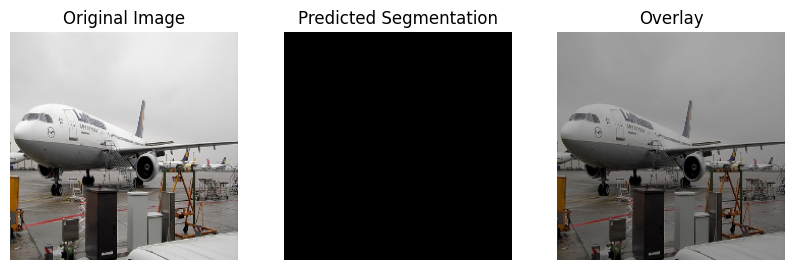

In [ ]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from albumentations import Compose, Resize, Normalize
from albumentations.pytorch import ToTensorV2
from transformers import ViTConfig, ViTModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = 21
vit_config = ViTConfig.from_pretrained("google/vit-base-patch16-224-in21k")
vit_model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k", config=vit_config)
mae_model = MaskedAutoencoder(vit_model)
vitmae_seg_model = ViTMAESegmentation(mae_model, num_classes=num_classes).to(device)

vitmae_seg_model.load_state_dict(torch.load("/content/vit_mae_segmentation_model.pth", map_location=device), strict=False)
vitmae_seg_model.eval()
print("Model loaded successfully")

transform = Compose([
    Resize(224, 224),
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

VOC_COLORMAP = [
    [0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0], [0, 0, 128],
    [128, 0, 128], [0, 128, 128], [128, 128, 128], [64, 0, 0], [192, 0, 0],
    [64, 128, 0], [192, 128, 0], [64, 0, 128], [192, 0, 128], [64, 128, 128],
    [192, 128, 128], [0, 64, 0], [128, 64, 0], [0, 192, 0], [128, 192, 0],
    [0, 64, 128]
]

def visualize_segmentation(original_image, predicted_mask, output_path):
    """Visualize and save the segmentation result."""
    colored_mask = np.zeros((*predicted_mask.shape, 3), dtype=np.uint8)
    for cls_id, color in enumerate(VOC_COLORMAP):
        colored_mask[predicted_mask == cls_id] = color

    original_image_resized = cv2.resize(original_image, (predicted_mask.shape[1], predicted_mask.shape[0]))

    overlay = cv2.addWeighted(original_image_resized, 0.7, colored_mask, 0.3, 0)

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original_image_resized, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Predicted Segmentation")
    plt.imshow(colored_mask)
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Overlay")
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.savefig(output_path)
    plt.show()

# Inference Function...
def infer_segmentation(image_path, model, transform, device, output_path):
    """Perform inference on a single image."""
    original_image = cv2.imread(image_path)
    image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    augmented = transform(image=image)
    input_tensor = augmented["image"].unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        predicted_mask = torch.argmax(output, dim=1).squeeze(0).cpu().numpy()

    visualize_segmentation(original_image, predicted_mask, output_path)

test_image_path = "/content/VOCdevkit/VOC2012/JPEGImages/2007_000033.jpg"
output_path = "segmentation_result.png"

infer_segmentation(test_image_path, vitmae_seg_model, transform, device, output_path)
